##Importing Data

In [1]:
!unzip -q elliptic_rings_imgs_png_wp.zip


Importing the Necessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import csv
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
os.rename('elliptic_rings_imgs_png_wp', 'images')
df = pd.read_csv('image_coordinates_180.csv')
df = df.drop(['Unnamed: 0'],axis=1)
cols = df.columns[:40]
cols = cols.tolist()
cols.append('img_paths')
cols
df = df[cols]


outer_coords = []
for i in range(1,11):
  outer_coords.append('x2_'+str(i))
  outer_coords.append('y2_'+str(i))
outer_coords.append('img_paths')
df = df[outer_coords]
df['img_paths'] = df['img_paths'].str.replace('images/', 'content/images_wp/')

df = df.iloc[:7500]
df
# train_df, test_df = train_test_split(df, test_size=0.25)
# test_df = test_df[34:]
train_val_data, test_data = train_test_split(df, test_size=0.15, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.15, random_state=42)
train_data
val_data
test_data = test_data.iloc[5:]
test_data

##Load the Images into a generator


In [5]:
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, df, X_col, y_col,
                 batch_size,
                 input_size=(180, 180, 3),
                 shuffle=True):
        
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        
        self.n = len(self.df)
        self.n_x1c = df[y_col['x1c']].nunique()
        self.n_y1c = df[y_col['y1c']].nunique()

        self.n_x2c = df[y_col['x2c']].nunique()
        self.n_y2c = df[y_col['y2c']].nunique()

        self.n_x3c = df[y_col['x3c']].nunique()
        self.n_y3c = df[y_col['y3c']].nunique()

        self.n_x4c = df[y_col['x4c']].nunique()
        self.n_y4c = df[y_col['y4c']].nunique()

        self.n_x5c = df[y_col['x5c']].nunique()
        self.n_y5c = df[y_col['y5c']].nunique()

        self.n_x6c = df[y_col['x6c']].nunique()
        self.n_y6c = df[y_col['y6c']].nunique()

        self.n_x7c = df[y_col['x7c']].nunique()
        self.n_y7c = df[y_col['y7c']].nunique()

        self.n_x8c = df[y_col['x8c']].nunique()
        self.n_y8c = df[y_col['y8c']].nunique()

        self.n_x9c = df[y_col['x9c']].nunique()
        self.n_y8c = df[y_col['y9c']].nunique()

        self.n_x10c = df[y_col['x10c']].nunique()
        self.n_y10c = df[y_col['y10c']].nunique()
      
      
    
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __get_input(self, path, target_size):
    
      
        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)

        return image_arr/255
    
    
    def __get_data(self, batches):
            # Generates data containing batch_size samples

            path_batch = batches[self.X_col['path']]
            
            #pt1
            x1c = batches[self.y_col['x1c']]
            y1c= batches[self.y_col['y1c']]
            x2c = batches[self.y_col['x2c']]
            y2c= batches[self.y_col['y2c']]

            #pt2
            x3c = batches[self.y_col['x3c']]
            y3c= batches[self.y_col['y3c']]
            x4c = batches[self.y_col['x4c']]
            y4c= batches[self.y_col['y4c']]

            #pt3
            x5c = batches[self.y_col['x5c']]
            y5c= batches[self.y_col['y5c']]
            x6c = batches[self.y_col['x6c']]
            y6c= batches[self.y_col['y6c']]

            #pt4
            x7c = batches[self.y_col['x7c']]
            y7c= batches[self.y_col['y7c']]
            x8c = batches[self.y_col['x8c']]
            y8c= batches[self.y_col['y8c']]

            #pt4
            x9c = batches[self.y_col['x9c']]
            y9c= batches[self.y_col['y9c']]
            x10c = batches[self.y_col['x10c']]
            y10c= batches[self.y_col['y10c']]

            X_batch = np.asarray([self.__get_input(x, self.input_size) for x in path_batch],dtype=np.float32)
            y0_batch = np.asarray([(x, y) for x, y in zip(y1c, x1c)])
            y1_batch = np.asarray([(x, y) for x, y in zip(y2c, x2c)])
            y_batch = np.asarray([(x, y,z,w,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p) for x, y,z,w,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p in zip(y1c, x1c,y2c,x2c,y3c, x3c,y4c,x4c,y5c, x5c,y6c,x6c,y7c,x7c,y8c,x8c,y9c,x9c,y10c,x10c)],dtype=np.float32)
            y_batch = y_batch/180


            return X_batch, y_batch
 

        
    def __getitem__(self, index):
            
            batches = self.df[index * self.batch_size:(index + 1) * self.batch_size]
            X, y = self.__get_data(batches)        
            return X, y
        
    def __len__(self):
            return self.n // self.batch_size

In [6]:
input_shape = (180,180,3)

traingen = CustomDataGen(train_data,
                         X_col={'path':'img_paths'},
                         y_col={'x1c': 'x2_1', 
                                'y1c': 'y2_1',
                                'x2c': 'x2_2',
                                'y2c': 'y2_2',
                                'x3c': 'x2_3', 
                                'y3c': 'y2_3',
                                'x4c': 'x2_4',
                                'y4c': 'y2_4',
                                'x5c': 'x2_5',
                                'y5c': 'y2_5',
                                'x6c': 'x2_6',
                                'y6c': 'y2_6',
                                'x7c': 'x2_7',
                                'y7c': 'y2_7',
                                'x8c': 'x2_8',
                                'y8c': 'y2_8',
                                'x9c': 'x2_9',
                                'y9c': 'y2_9',
                                'x10c': 'x2_10',
                                'y10c': 'y2_10',
                                },
                         batch_size=32, input_size=input_shape)
X, y= traingen[0]


In [7]:
testgen = CustomDataGen(test_data,
                         X_col={'path':'img_paths'},
               
                         y_col={'x1c': 'x2_1', 
                                'y1c': 'y2_1',
                                'x2c': 'x2_2',
                                'y2c': 'y2_2',
                                'x3c': 'x2_3', 
                                'y3c': 'y2_3',
                                'x4c': 'x2_4',
                                'y4c': 'y2_4',
                                'x5c': 'x2_5',
                                'y5c': 'y2_5',
                                'x6c': 'x2_6',
                                'y6c': 'y2_6',
                                'x7c': 'x2_7',
                                'y7c': 'y2_7',
                                'x8c': 'x2_8',
                                'y8c': 'y2_8',
                                'x9c': 'x2_9',
                                'y9c': 'y2_9',
                                'x10c': 'x2_10',
                                'y10c': 'y2_10',
                                },
                         batch_size=32, input_size=input_shape)



In [8]:
valgen = CustomDataGen(val_data,
                         X_col={'path':'img_paths'},
                         y_col={'x1c': 'x2_1', 
                                'y1c': 'y2_1',
                                'x2c': 'x2_2',
                                'y2c': 'y2_2',
                                'x3c': 'x2_3', 
                                'y3c': 'y2_3',
                                'x4c': 'x2_4',
                                'y4c': 'y2_4',
                                'x5c': 'x2_5',
                                'y5c': 'y2_5',
                                'x6c': 'x2_6',
                                'y6c': 'y2_6',
                                'x7c': 'x2_7',
                                'y7c': 'y2_7',
                                'x8c': 'x2_8',
                                'y8c': 'y2_8',
                                'x9c': 'x2_9',
                                'y9c': 'y2_9',
                                'x10c': 'x2_10',
                                'y10c': 'y2_10',
                                },
                         batch_size=32, input_size=input_shape)


##Loss Function

In [9]:
def euclid_loss(y_true, y_pred):
  loss =  tf.math.reduce_sum(tf.math.squared_difference(y_pred, y_true),axis=1)
  return tf.math.reduce_mean(loss)*10000

In [10]:

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="loss", 
                                        mode ="min", patience = 5,min_delta=0.1,
                                        restore_best_weights = True)


## Model Architecture

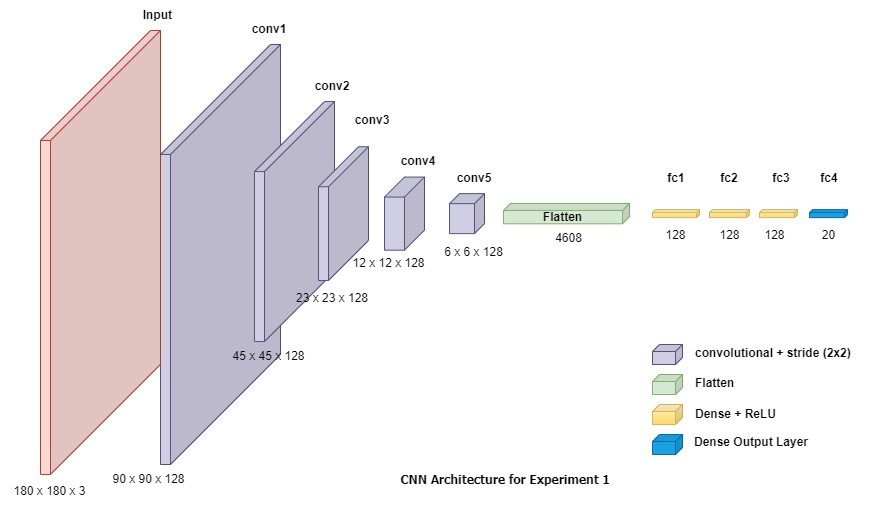

In [11]:
channel_size = 128
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(channel_size, kernel_size=(3, 3), strides=(2,2), padding="same", activation="relu"),
        layers.Conv2D(channel_size, kernel_size=(3, 3), strides=(2,2), padding="same", activation="relu"),
        layers.Conv2D(channel_size, kernel_size=(3, 3), strides=(2,2), padding="same", activation="relu"),
        layers.Conv2D(channel_size, kernel_size=(3, 3), strides=(2,2), padding="same", activation="relu"),
        layers.Conv2D(channel_size, kernel_size=(3, 3), strides=(2,2), padding="same", activation="relu"),
        # layers.Conv2D(channel_size, kernel_size=(3, 3), strides=(2,2), padding="same", activation="relu"),

        layers.Flatten(),
        # layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(20),
    ]
)

opt = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss=euclid_loss, optimizer=opt)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 128)       147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               5

###Fitting the Data

In [12]:
history = model.fit(traingen, epochs=25,validation_data=valgen)


Epoch 1/25
169/169 [==============================] - 20s 41ms/step - loss: 31672.6719 - val_loss: 10425.0273
Epoch 2/25
169/169 [==============================] - 7s 39ms/step - loss: 2292.4355 - val_loss: 227.1739
Epoch 3/25
169/169 [==============================] - 6s 37ms/step - loss: 182.1561 - val_loss: 159.4451
Epoch 4/25
169/169 [==============================] - 6s 38ms/step - loss: 131.9270 - val_loss: 119.0250
Epoch 5/25
169/169 [==============================] - 6s 38ms/step - loss: 100.8505 - val_loss: 90.6970
Epoch 6/25
169/169 [==============================] - 6s 38ms/step - loss: 75.5378 - val_loss: 64.9680
Epoch 7/25
169/169 [==============================] - 7s 39ms/step - loss: 53.2664 - val_loss: 46.4602
Epoch 8/25
169/169 [==============================] - 6s 38ms/step - loss: 39.2262 - val_loss: 35.0735
Epoch 9/25
169/169 [==============================] - 6s 38ms/step - loss: 29.7616 - val_loss: 25.8859
Epoch 10/25
169/169 [==============================] - 7s 

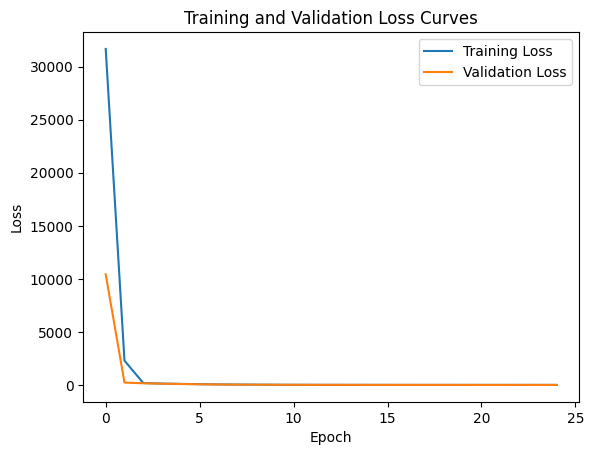

In [13]:
# plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Prediction on Test Data


In [14]:
predicted = model.predict(testgen)


35/35 [==============================] - 1s 32ms/step


###Visualization of the predicted data

In [15]:
pred_cols = []
for i in range(1,11):
  pred_cols.append('y2_'+str(i))
  pred_cols.append('x2_'+str(i))


In [16]:
pred_df = pd.DataFrame(predicted,columns=pred_cols)
pred_df = (pred_df.iloc[:,:]*180).astype('int')
c = outer_coords[:20]
pred_df = pd.DataFrame(pred_df[outer_coords[:20]].to_numpy(),columns=outer_coords[:20])
img_df = pd.DataFrame(test_data['img_paths'].to_numpy(),columns=['path'])


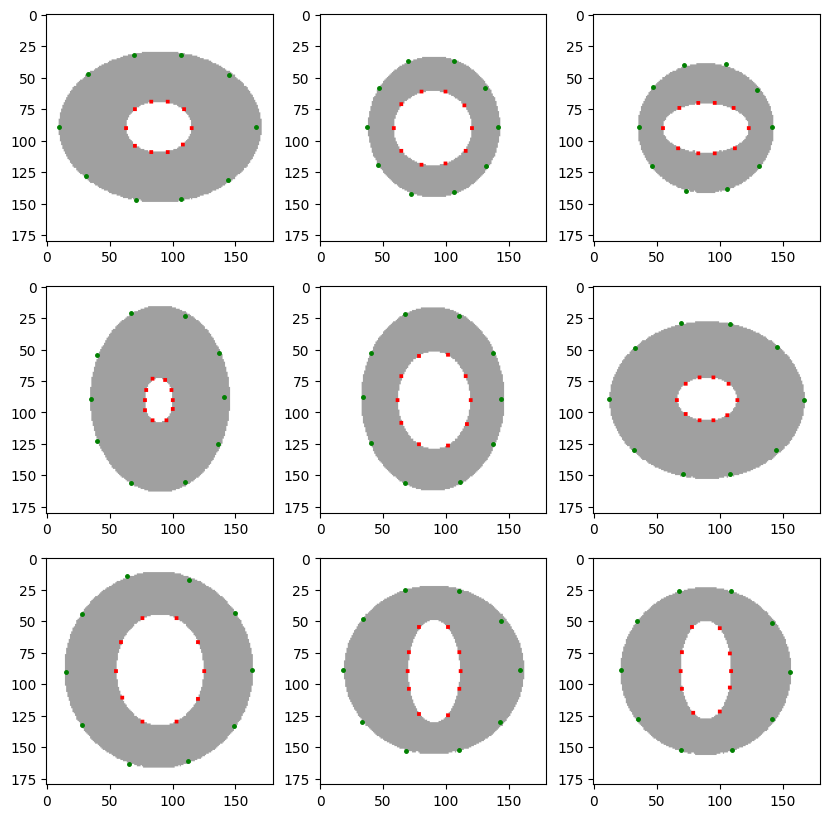

In [18]:
row = 0 #row less than 1559
plt.figure(figsize=(10, 10))
# inner_color= 'purple'
outer_color = 'green'

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img_path = img_df.iloc[row+i,:][0]
    image = cv2.imread(img_path)

    #pt 1
    # plt.plot(pred_df['x1_1'][row+i],pred_df['y1_1'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_1'][row+i],pred_df['y2_1'][row+i],marker='.',markersize=5,color=outer_color)


    #pt 2
    # plt.plot(pred_df['x1_2'][row+i],pred_df['y1_2'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_2'][row+i],pred_df['y2_2'][row+i],marker='.',markersize=5,color=outer_color)

    #pt 3
    # plt.plot(pred_df['x1_3'][row+i],pred_df['y1_3'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_3'][row+i],pred_df['y2_3'][row+i],marker='.',markersize=5,color=outer_color)


    #pt 4
    # plt.plot(pred_df['x1_4'][row+i],pred_df['y1_4'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_4'][row+i],pred_df['y2_4'][row+i],marker='.',markersize=5,color=outer_color)

    #pt 4
    # plt.plot(pred_df['x1_5'][row+i],pred_df['y1_5'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_5'][row+i],pred_df['y2_5'][row+i],marker='.',markersize=5,color=outer_color)

    #pt 6
    # plt.plot(pred_df['x1_6'][row+i],pred_df['y1_6'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_6'][row+i],pred_df['y2_6'][row+i],marker='.',markersize=5,color=outer_color)

        #pt 7
    # plt.plot(pred_df['x1_7'][row+i],pred_df['y1_7'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_7'][row+i],pred_df['y2_7'][row+i],marker='.',markersize=5,color=outer_color)


    #pt 8
    # plt.plot(pred_df['x1_8'][row+i],pred_df['y1_8'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_8'][row+i],pred_df['y2_8'][row+i],marker='.',markersize=5,color=outer_color)

    #pt 9
    # plt.plot(pred_df['x1_9'][row+i],pred_df['y1_9'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_9'][row+i],pred_df['y2_9'][row+i],marker='.',markersize=5,color=outer_color)


    #pt 10
    # plt.plot(pred_df['x1_10'][row+i],pred_df['y1_10'][row+i],marker='.',markersize=5,color=inner_color)
    plt.plot(pred_df['x2_10'][row+i],pred_df['y2_10'][row+i],marker='.',markersize=5,color=outer_color)


    plt.imshow(image)


In [19]:
df_true = test_data.iloc[:,:20]
df_pred = pred_df

Evaluation Metrics

In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the mean squared error (MSE) for all 10 predicted points
mse = mean_squared_error(df_true, df_pred)
print("MSE: ", mse)

# Calculate the root mean squared error (RMSE) for all 10 predicted points
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

# Calculate the mean absolute error (MAE) for all 10 predicted points
mae = mean_absolute_error(df_true, df_pred)
print("MAE: ", mae)

# Calculate the coefficient of determination (R^2) for all 10 predicted points
r2 = r2_score(df_true, df_pred)
print("R^2: ", r2)


MSE:  1.3811160714285713
RMSE:  1.1752089479869405
MAE:  0.8893303571428571
R^2:  0.8283635329144083


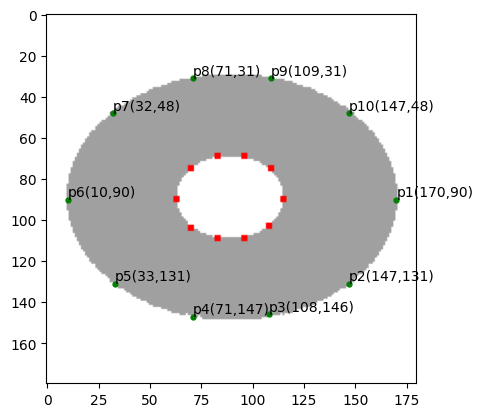

In [21]:
row=0
i=0
img_path = img_df.iloc[row+i][0]
image = cv2.imread(img_path)
test_df = test_data
outer_color = 'green'
count =0
for x in range(0,20,2):
  y=x+1
  count = count + 1
  plt.plot(test_df.iloc[row+i][x],test_df.iloc[row+i][y],marker='.',markersize=7,color=outer_color)
  plt.text(test_df.iloc[row+i][x], test_df.iloc[row+i][y],'p'+str(count)+'('+str(test_df.iloc[row+i][x])+','+str(test_df.iloc[row+i][y])+')', ha='left', va='bottom')


#     #pt 2
# plt.plot(test_df.iloc[row+i][2],test_df.iloc[row+i][3],marker='.',markersize=5,color=outer_color)

#     #pt 3
# plt.plot(test_df.iloc[row+i][4],test_df.iloc[row+i][5],marker='.',markersize=5,color=outer_color)
# plt.plot(test_df.iloc[row+i][6],test_df.iloc[row+i][7],marker='.',markersize=5,color=outer_color)
# plt.plot(test_df.iloc[row+i][8],test_df.iloc[row+i][9],marker='.',markersize=5,color=outer_color)
# plt.plot(test_df.iloc[row+i][10],test_df.iloc[row+i][11],marker='.',markersize=5,color=outer_color)
# plt.plot(test_df.iloc[row+i][12],test_df.iloc[row+i][13],marker='.',markersize=5,color=outer_color)
# plt.plot(test_df.iloc[row+i][14],test_df.iloc[row+i][15],marker='.',markersize=5,color=outer_color)
# plt.plot(test_df.iloc[row+i][16],test_df.iloc[row+i][17],marker='.',markersize=5,color=outer_color)
# plt.plot(test_df.iloc[row+i][18],test_df.iloc[row+i][19],marker='.',markersize=5,color=outer_color)

plt.savefig('exp2_1.png')
plt.imshow(image)
